In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_parquet("data/train.parquet")
train_df.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [4]:
train_df.describe()

,site_id,bike_count,date,counter_installation_date,latitude,longitude,log_bike_count
count,4.968270e+05,496827.000000,496827,496827,496827.000000,496827.000000,496827.000000
mean,1.053450e+08,60.191475,2021-03-08 07:25:59.668858,2019-04-04 07:24:35.245911,48.854343,2.345479,3.079917
min,1.000070e+08,0.000000,2020-09-01 01:00:00,2013-01-18 00:00:00,48.826360,2.265420,0.000000
25%,1.000475e+08,5.000000,2020-12-05 22:00:00,2018-11-29 00:00:00,48.840801,2.314440,1.791759
50%,1.000562e+08,29.000000,2021-03-08 11:00:00,2019-11-06 00:00:00,48.852090,2.353870,3.401197
75%,1.000563e+08,79.000000,2021-06-09 14:00:00,2019-12-11 00:00:00,48.864610,2.375870,4.382027
max,3.000147e+08,1302.000000,2021-09-09 23:00:00,2020-11-29 00:00:00,48.891720,2.409690,7.172425
std,3.210346e+07,87.590566,NaN,NaN,0.018554,0.038026,1.659899


array([[<Axes: title={'center': 'site_id'}>,
        <Axes: title={'center': 'bike_count'}>,
        <Axes: title={'center': 'date'}>],
       [<Axes: title={'center': 'counter_installation_date'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'log_bike_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

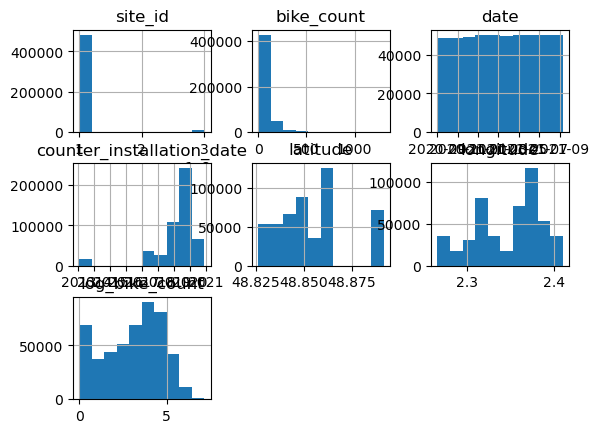

In [5]:
train_df.hist()

In [6]:
# Check for missing values
missing_values = train_df.isnull().sum()
print(missing_values)

counter_id                   0
counter_name                 0
site_id                      0
site_name                    0
bike_count                   0
date                         0
counter_installation_date    0
coordinates                  0
counter_technical_id         0
latitude                     0
longitude                    0
log_bike_count               0
dtype: int64


counter_id: 56 unique values
counter_name: 56 unique values
site_name: 30 unique values
coordinates: 30 unique values
counter_technical_id: 30 unique values


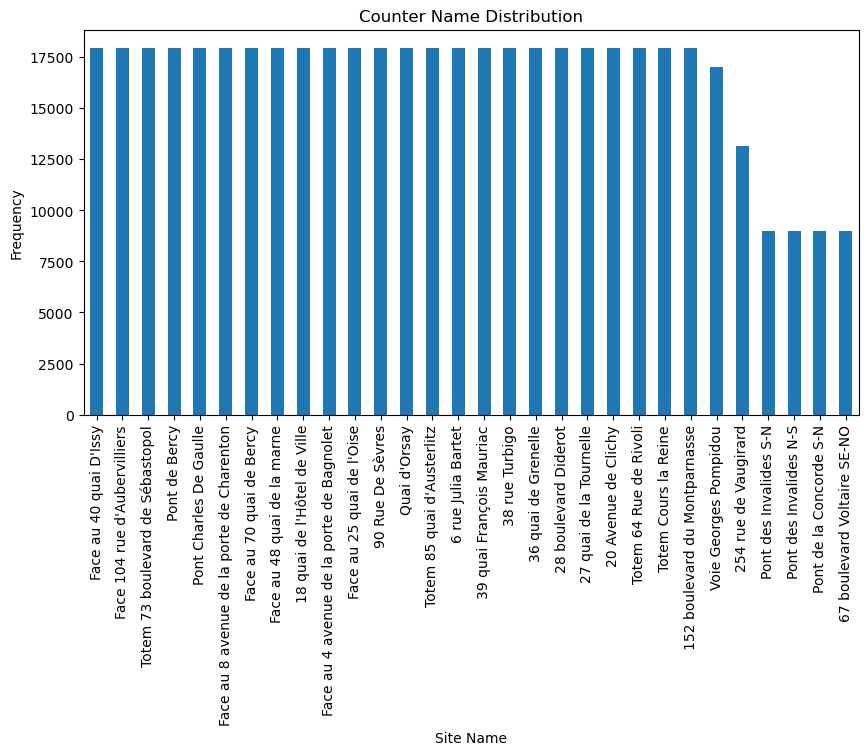

In [7]:

for col in train_df.select_dtypes(include='category').columns:
    print(f"{col}: {train_df[col].nunique()} unique values")


train_df['site_name'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Counter Name Distribution")
plt.xlabel("Site Name")
plt.ylabel("Frequency")
plt.show()


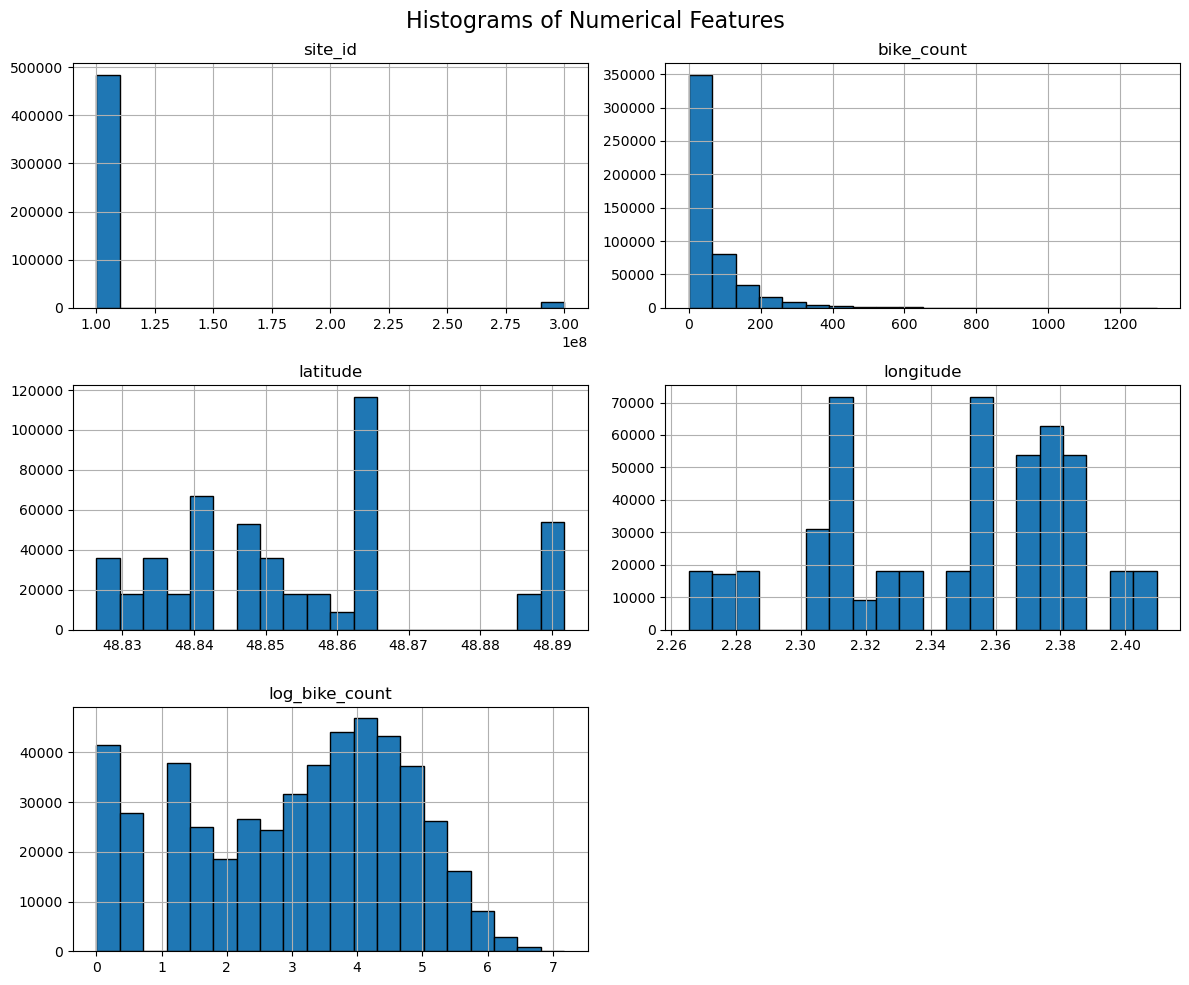

C:\Users\sheet\AppData\Local\Temp\ipykernel_22112\2022218082.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['bike_count'], shade=True)


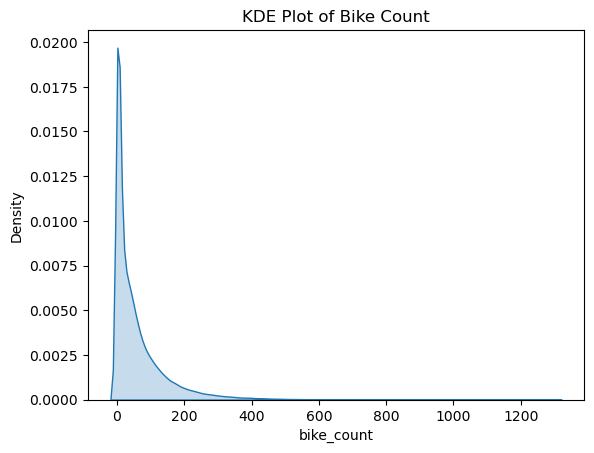

In [8]:

numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numerical_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


sns.kdeplot(train_df['bike_count'], shade=True)
plt.title("KDE Plot of Bike Count")
plt.show()

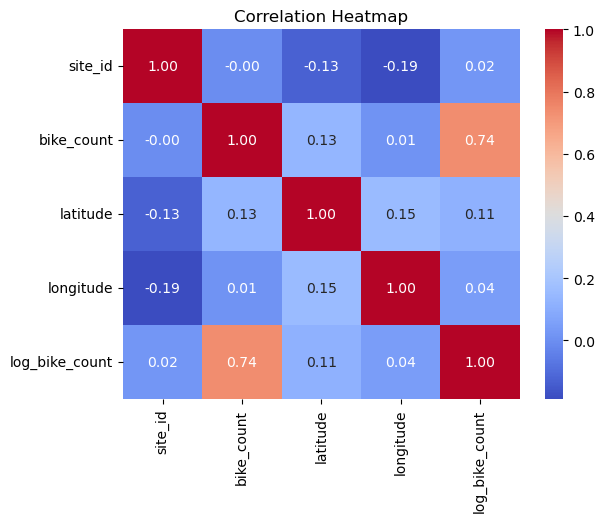

In [9]:
# Correlation heatmap
corr_matrix = train_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()




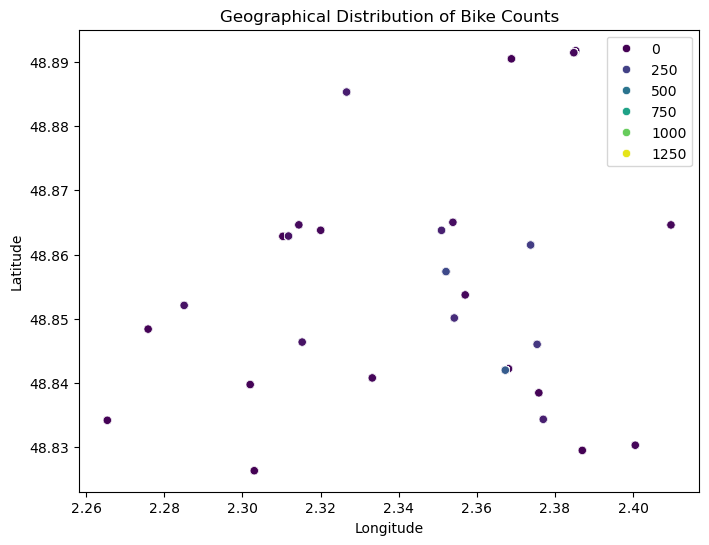

In [10]:
# Scatter plot between `latitude` and `longitude`
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='bike_count', data=train_df, palette='viridis')
plt.title("Geographical Distribution of Bike Counts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [11]:
# Extract date features
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['hour'] = train_df['date'].dt.hour

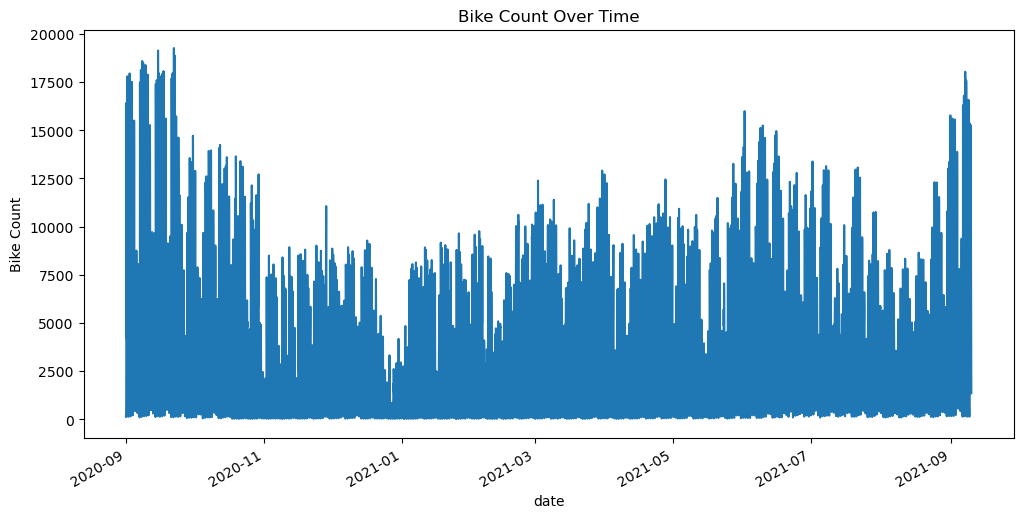

In [12]:
# Plotting bike counts over time
plt.figure(figsize=(12, 6))
train_df.groupby('date')['bike_count'].sum().plot()
plt.title("Bike Count Over Time")
plt.ylabel("Bike Count")
plt.show()


C:\Users\sheet\AppData\Local\Temp\ipykernel_22112\3566744225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df['bike_count'], palette='viridis')


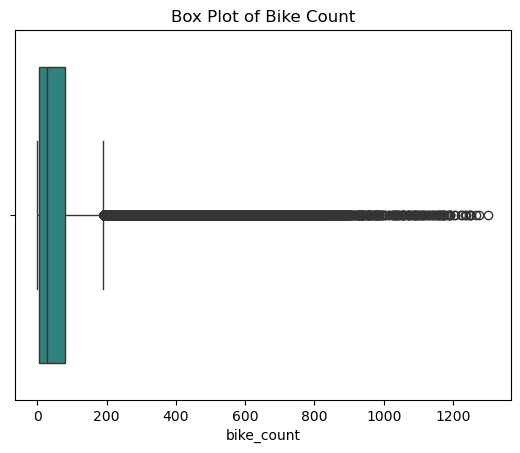

In [13]:
# Boxplot for `bike_count`
sns.boxplot(x=train_df['bike_count'], palette='viridis')
plt.title("Box Plot of Bike Count")
plt.show()


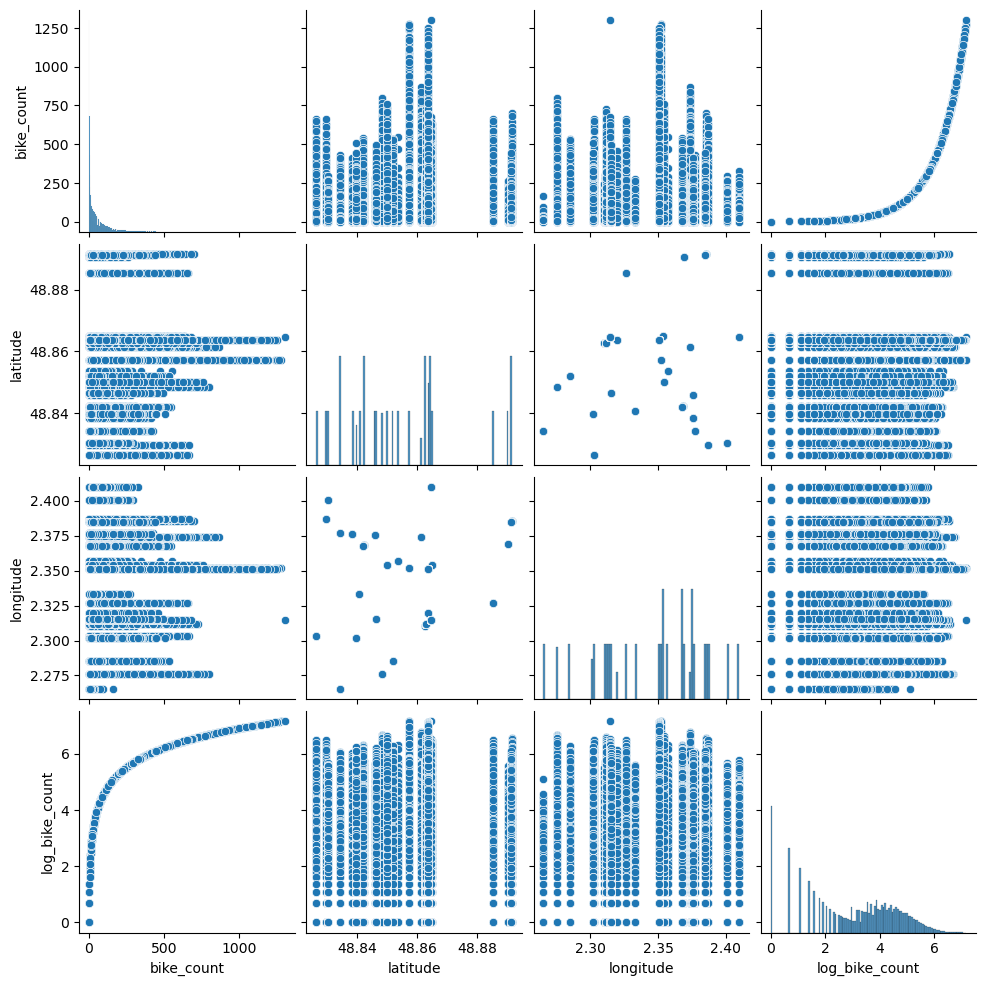

In [14]:
# Pair plot for selected features
select_cols = ['bike_count', 'latitude', 'longitude', 'log_bike_count']
sns.pairplot(train_df[select_cols])
plt.show()


In [15]:
weather_df = pd.read_csv("external_data/external_data.csv")

weather_df.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN


In [16]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 59 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  3322 non-null   int64  
 1   date       3322 non-null   object 
 2   pmer       3322 non-null   int64  
 3   tend       3322 non-null   int64  
 4   cod_tend   3322 non-null   int64  
 5   dd         3322 non-null   int64  
 6   ff         3322 non-null   float64
 7   t          3322 non-null   float64
 8   td         3322 non-null   float64
 9   u          3322 non-null   int64  
 10  vv         3322 non-null   int64  
 11  ww         3322 non-null   int64  
 12  w1         3315 non-null   float64
 13  w2         3312 non-null   float64
 14  n          3166 non-null   float64
 15  nbas       3317 non-null   float64
 16  hbas       2869 non-null   float64
 17  cl         2909 non-null   float64
 18  cm         1941 non-null   float64
 19  ch         1678 non-null   float64
 20  pres    

In [17]:
weather_df.describe()

,numer_sta,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
count,3322.0,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,...,2867.000000,1695.000000,1443.000000,1695.000000,618.000000,470.000000,618.000000,42.000000,87.000000,42.000000
mean,7149.0,101682.886815,-0.237809,4.273028,184.379892,3.654154,285.877905,281.006442,74.775135,20142.338952,...,2028.674573,5.030678,4.515593,2692.943953,5.441748,3.961702,3310.695793,3.476190,6.735632,3205.000000
std,0.0,923.888170,122.191314,2.713199,103.708084,2.000353,6.851700,5.634409,17.022427,10283.556918,...,2377.241533,2.003304,2.463098,2309.340104,2.017108,3.042454,2423.703985,2.360633,3.196873,2595.553656
min,7149.0,97260.000000,-750.000000,0.000000,0.000000,0.000000,267.650000,260.750000,24.000000,120.000000,...,0.000000,1.000000,0.000000,60.000000,1.000000,0.000000,300.000000,1.000000,0.000000,360.000000
25%,7149.0,101200.000000,-70.000000,2.000000,80.000000,2.200000,280.950000,276.950000,63.000000,12710.000000,...,500.000000,3.000000,3.000000,1080.000000,4.250000,0.000000,1400.000000,1.000000,6.000000,1112.500000
50%,7149.0,101820.000000,0.000000,3.000000,200.000000,3.400000,285.850000,281.450000,79.000000,20000.000000,...,1080.000000,5.000000,6.000000,1800.000000,6.000000,3.000000,2430.000000,2.500000,8.000000,2150.000000
75%,7149.0,102287.500000,70.000000,7.000000,260.000000,4.900000,290.650000,285.550000,89.000000,25000.000000,...,2100.000000,7.000000,6.000000,3400.000000,7.000000,6.000000,5000.000000,5.750000,9.000000,5800.000000
max,7149.0,103920.000000,720.000000,8.000000,360.000000,14.600000,307.450000,293.150000,100.000000,60000.000000,...,9000.000000,8.000000,9.000000,9000.000000,8.000000,9.000000,9000.000000,7.000000,9.000000,8000.000000


In [18]:
missing_percentage = weather_df.isnull().mean() * 100
missing_percentage.sort_values(ascending=False)


sw           100.000000
niv_bar      100.000000
phenspe4     100.000000
phenspe3     100.000000
phenspe2     100.000000
phenspe1     100.000000
tw           100.000000
tx24         100.000000
tn24         100.000000
geop         100.000000
tminsol       99.969898
nnuage4       98.735701
hnuage4       98.735701
ctype4        97.381096
ctype3        85.851896
hnuage3       81.396749
nnuage3       81.396749
tn12          75.015051
tx12          75.015051
ctype2        56.562312
ch            49.488260
hnuage2       48.976520
nnuage2       48.976520
cm            41.571343
ctype1        24.021674
hnuage1       13.696568
hbas          13.636364
nnuage1       13.515954
ssfrai        13.395545
perssfrai     13.395545
cl            12.432270
n              4.695966
etat_sol       1.565322
ht_neige       1.475015
rr24           0.722456
rr12           0.662252
rr6            0.481638
w2             0.301023
raf10          0.301023
tend24         0.301023
rr1            0.270921
w1             0

In [19]:
threshold = len(weather_df) * 0.8
weather_df = weather_df.dropna(axis=1, thresh=threshold)

# Drop rows with any NaN values
weather_df = weather_df.dropna()

In [20]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year
weather_df['month'] = weather_df['date'].dt.month


<Axes: >

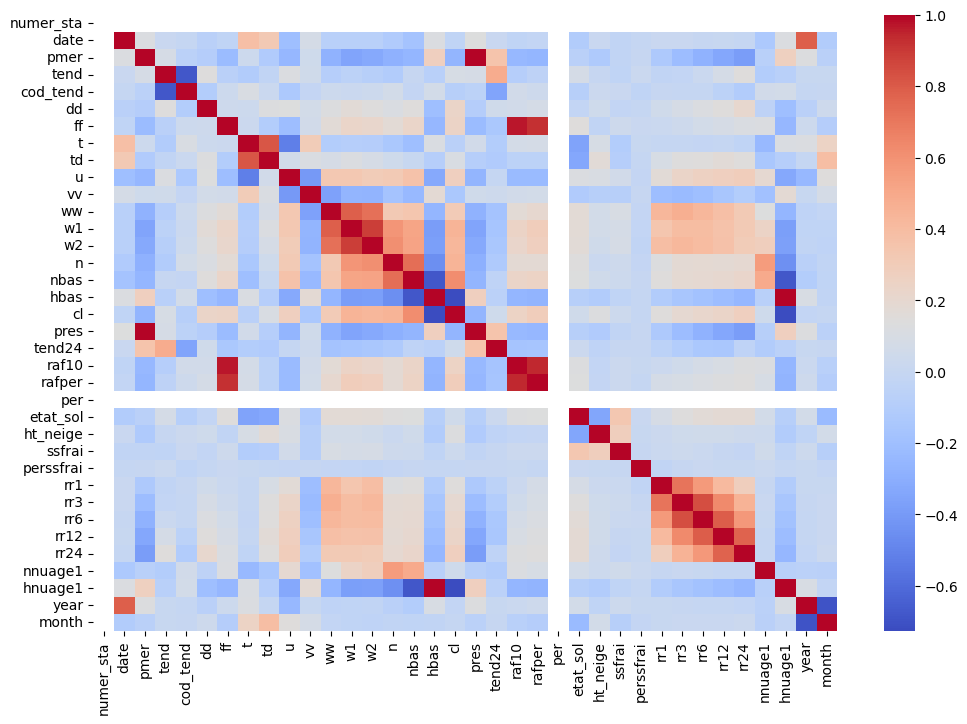

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(weather_df.corr(), annot=False, cmap='coolwarm')


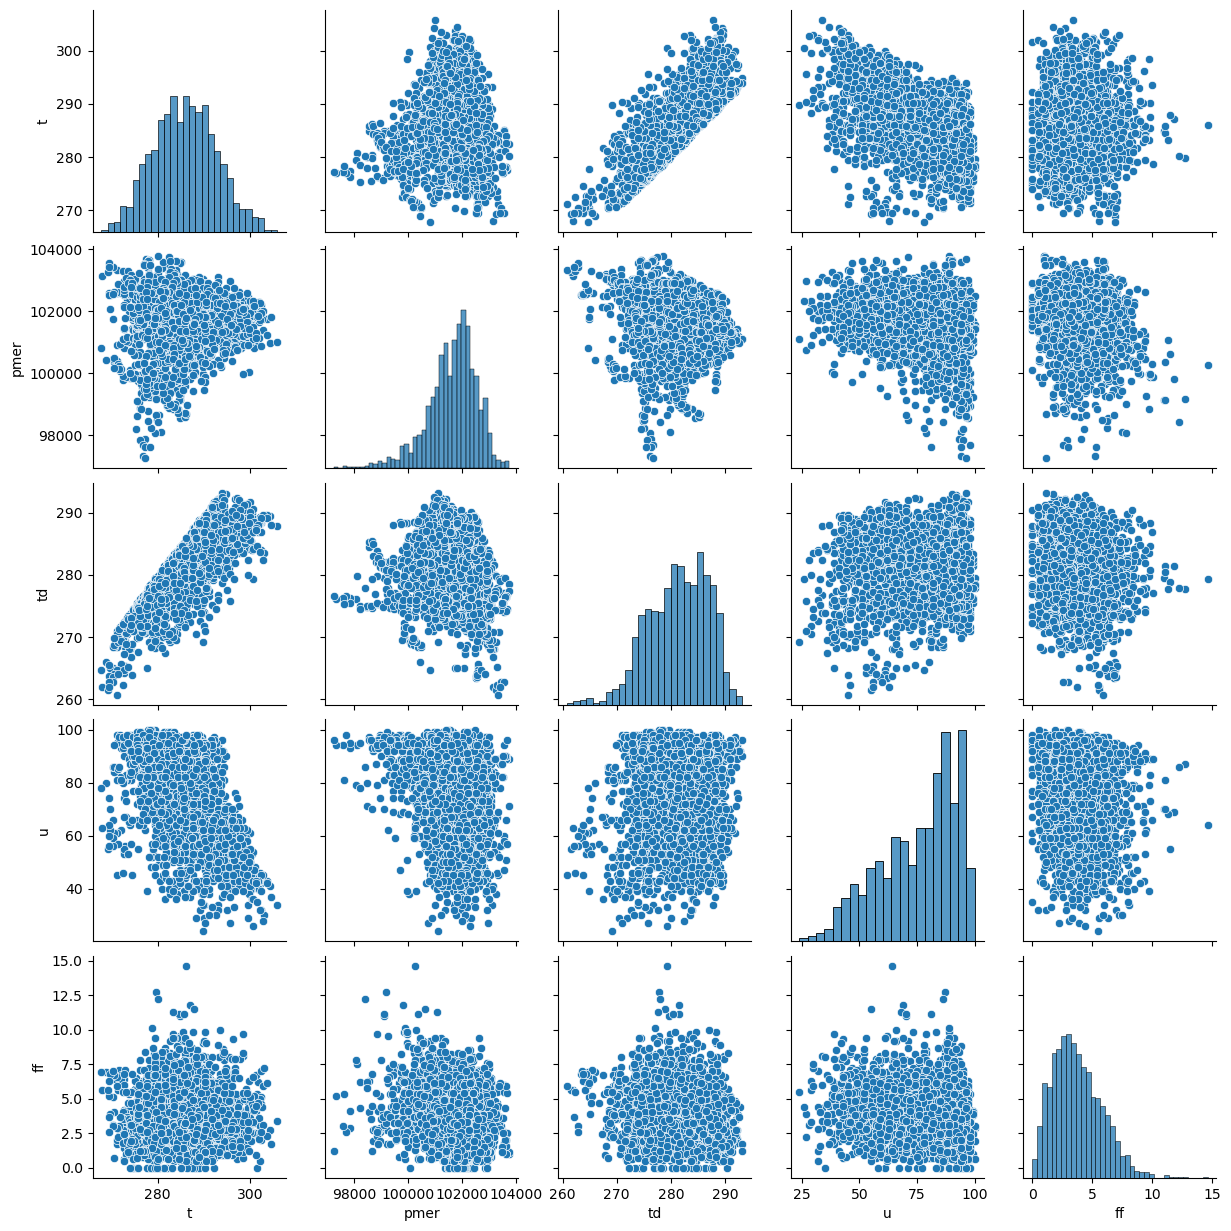

In [22]:
sns.pairplot(weather_df[['t', 'pmer', 'td', 'u', 'ff']])


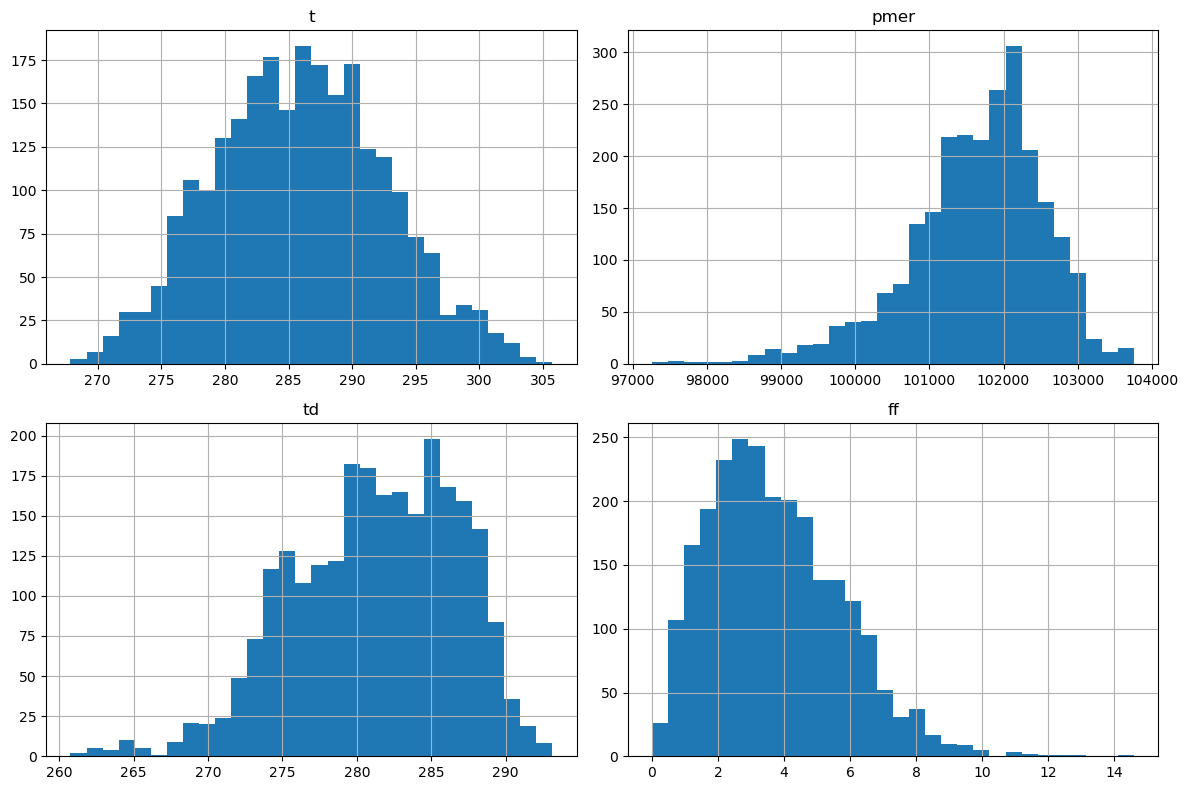

In [23]:
weather_df[['t', 'pmer', 'td', 'ff']].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


<Axes: xlabel='t'>

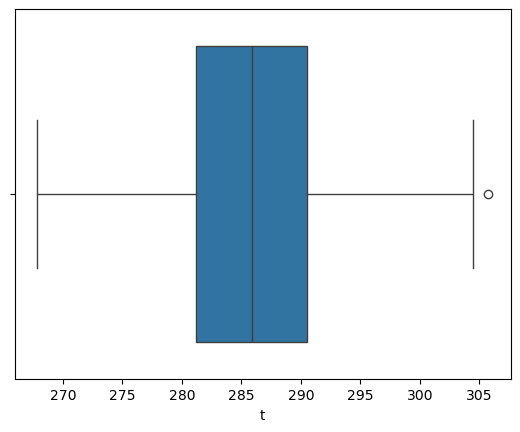

In [24]:
sns.boxplot(x=weather_df['t'])


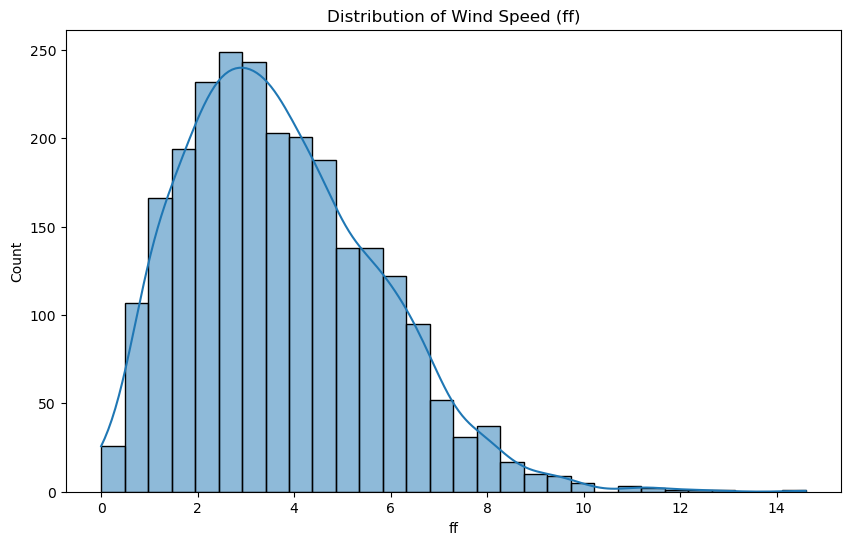

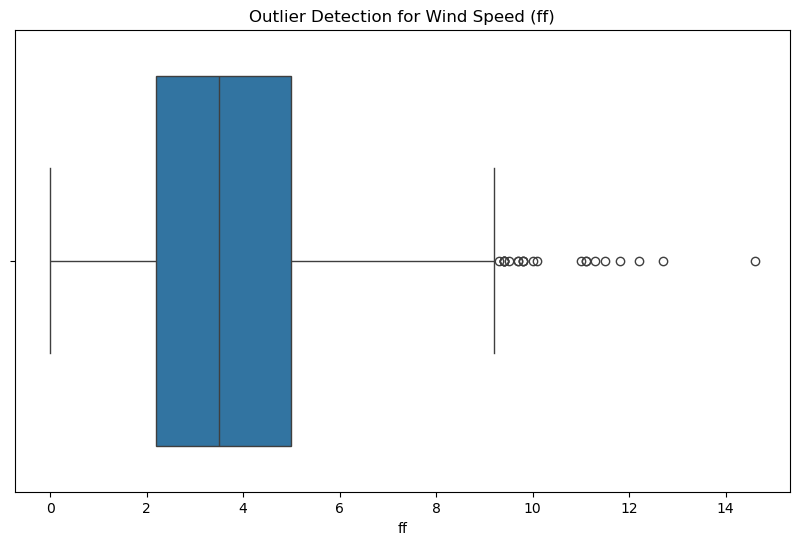

In [25]:
# Histogram for wind speed ('ff')
plt.figure(figsize=(10, 6))
sns.histplot(weather_df['ff'], kde=True, bins=30)
plt.title('Distribution of Wind Speed (ff)')
plt.show()

# Boxplot for wind speed ('ff')
plt.figure(figsize=(10, 6))
sns.boxplot(x=weather_df['ff'])
plt.title('Outlier Detection for Wind Speed (ff)')
plt.show()


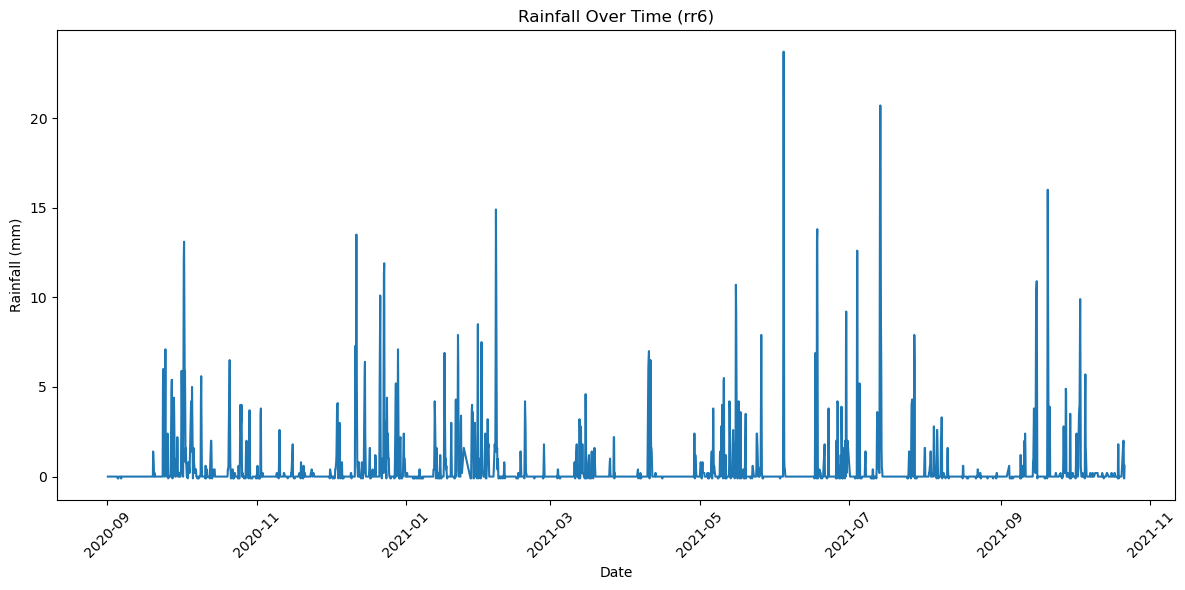

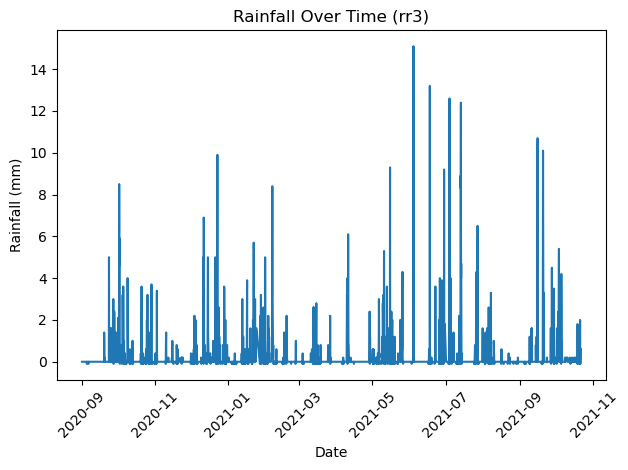

In [27]:
# Line plot for rainfall over time ('rr1')
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='rr6', data=weather_df)
plt.title('Rainfall Over Time (rr6)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Similarly, you can analyze other rainfall columns (e.g., 'rr3', 'rr6')
sns.lineplot(x='date', y='rr3', data=weather_df)
plt.title('Rainfall Over Time (rr3)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
